In [17]:
# Load Cleaned Data
import pandas as pd

# Load the datasets
benin = pd.read_csv("../data/benin_clean.csv")
sierraleone = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")

# Add a country column to each
benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine into one DataFrame
df = pd.concat([benin, sierraleone, togo], ignore_index=True)
df.head()



,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


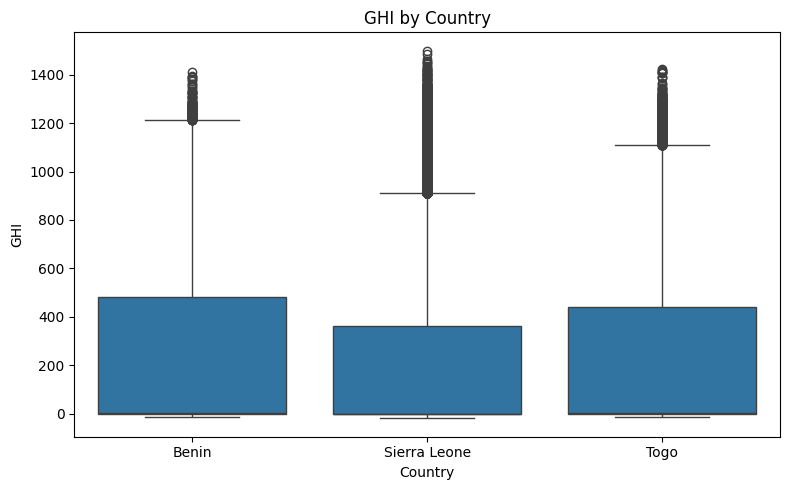

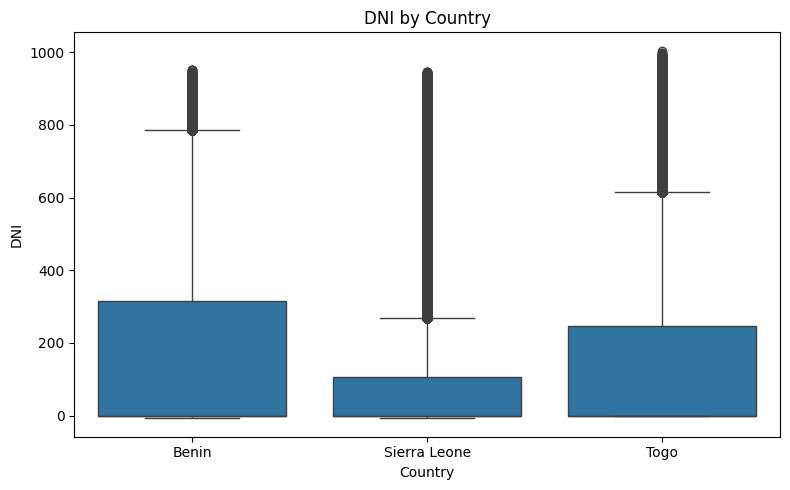

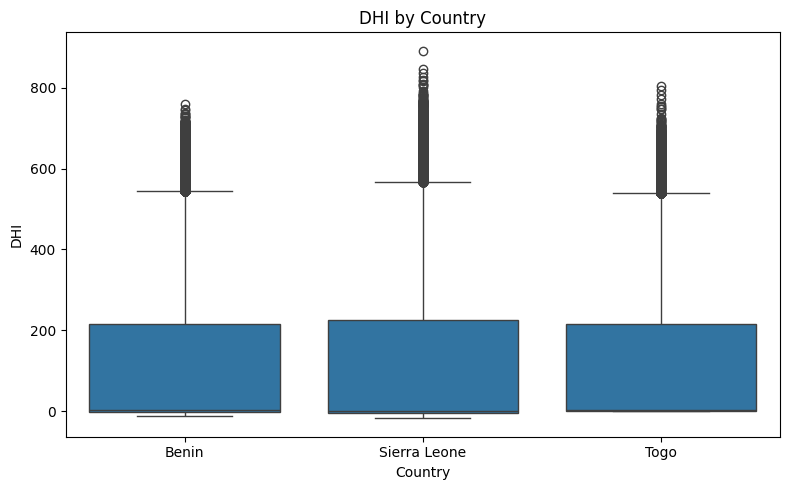

In [18]:
# Boxplots for GHI, DNI, DHI
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=df)
    plt.title(f'{metric} by Country')
    plt.ylabel(metric)
    plt.xlabel('Country')
    plt.tight_layout()
    plt.show()


In [19]:
# Summary Table (mean, median, std)
summary = df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])
summary.columns = ['_'.join(col) for col in summary.columns]  # flatten column names
summary


,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
Country,,,,,,,,,
Benin,240.559452,1.8,331.131327,167.187516,-0.1,261.710501,115.358961,1.6,158.691074
Sierra Leone,201.957515,0.3,298.495150,116.376337,-0.1,218.652659,113.720571,-0.1,158.946032
Togo,230.555040,2.1,322.532347,151.258469,0.0,250.956962,116.444352,2.5,156.520714


In [20]:
# Statistical Testing (ANOVA or Kruskal-Wallis)
from scipy.stats import f_oneway, kruskal

# Option A: ANOVA (assumes normal distribution and equal variance)
anova_result = f_oneway(benin['GHI'], sierraleone['GHI'], togo['GHI'])
print("ANOVA p-value:", anova_result.pvalue)

# Option B (safer): Kruskal-Wallis (non-parametric)
kruskal_result = kruskal(benin['GHI'], sierraleone['GHI'], togo['GHI'])
print("Kruskal-Wallis p-value:", kruskal_result.pvalue)


ANOVA p-value: 0.0
Kruskal-Wallis p-value: 0.0


# Key Observations

- **Benin** shows the highest **mean and standard deviation for GHI**, indicating high solar potential but also **greater variability**.
- **Togo** has the highest **median values** for all three metrics (GHI, DNI, DHI), suggesting it has **consistent mid-level solar performance**.
- **Sierraleone** has the **lowest mean and median values** for GHI and DNI, making it the **least favorable** in terms of average solar resource availability.


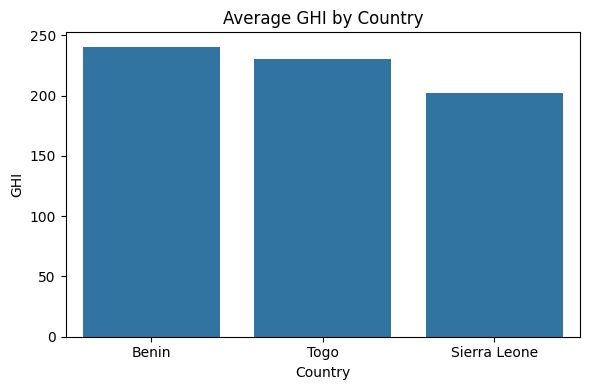

In [21]:
# (Bonus)Visual Summary Bar Chart of Average GHI by Country
avg_ghi = df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values)
plt.title("Average GHI by Country")
plt.ylabel("GHI")
plt.xlabel("Country")
plt.tight_layout()
plt.show()
